# Visualization of Appendix A.2 for twitter data

Load packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as md
import matplotlib.dates as mdates
from datetime import datetime as dt
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')

Load the data

In [2]:
statistics_twitter = {}
# Load only subsets
p = "data/statistics/"
for file in [file for file in os.listdir(p) if ('days' in file)]:
    if 'statistics' in file and "notebookdemo" not in file:
        data = pd.read_csv(p+file)
        if str(data['start_date'][0])[-2:] == ".0":
            data['start_date'] = data['start_date'].apply(lambda x: dt.strptime(str(x), "%Y%m%d.0"))
        else:
            data['start_date'] = data['start_date'].apply(lambda x: dt.strptime(str(x), "%Y%m%d"))
        data['middle_date'] = data['middle_date'].apply(lambda x: dt.strptime(str(x), "%Y%m%d"))
        data = data.set_index('middle_date')
        data = data.drop(columns=["Unnamed: 1"])
        statistics_twitter[file.split("_")[1].split(".")[0]] = data

In [3]:
%%capture
df2 = statistics_twitter['11days']

wanted_stats = ['number_unique_users', 'no_real_movements', 'jl_simple_means_over_user_means',\
                  'graph_modularity', 'rel_tweets_in_residential_areas', 'mean_rog']

# convert some metric units 
df2['mean_rog'] = df2['mean_rog']/1000 # from meters into kilometers
df2['jl_simple_means_over_user_means'] = df2['jl_simple_means_over_user_means']/1000 # from meters into kilometers
df2['rel_tweets_in_residential_areas'] = df2['rel_tweets_in_residential_areas']*100 # from decimal percentage to percentage between 0 and 100

df2 = df2[wanted_stats]

for stat in wanted_stats:
    df2[stat+"_avg"] = df2[stat].rolling(28, center=True).mean()

In [4]:
df = df2
df['date'] = df.index

Plot the temporal singal of 'amount of movements' 

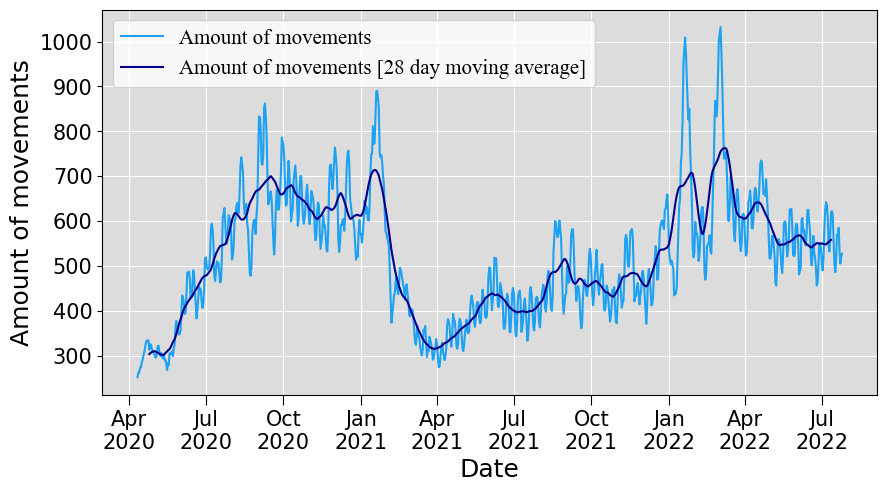

In [5]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.rcParams["font.family"] = "Times New Roman"
sns.lineplot(ax = ax, x='date',  y='no_real_movements', data=df, color="#1DA1F2",label ='Amount of movements')
sns.lineplot(ax = ax, x='date', y='no_real_movements_avg', data=df, color='darkblue', label ='Amount of movements [28 day moving average]')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
plt.setp(ax.xaxis.get_majorticklabels(), size= 15)
plt.setp(ax.yaxis.get_majorticklabels(), size= 15)
ax.tick_params(axis = 'x', which = 'major', length = 7)
ax.tick_params(axis = 'x', which = 'minor', length = 20)
plt.xlabel('Date', size=18)
plt.ylabel('Amount of movements', size=18)
ax.legend(prop={'size': 15})
ax.grid(True, color='white')
ax.set_facecolor('gainsboro')
plt.show()

Plot the temporal singal of 'unique users' 

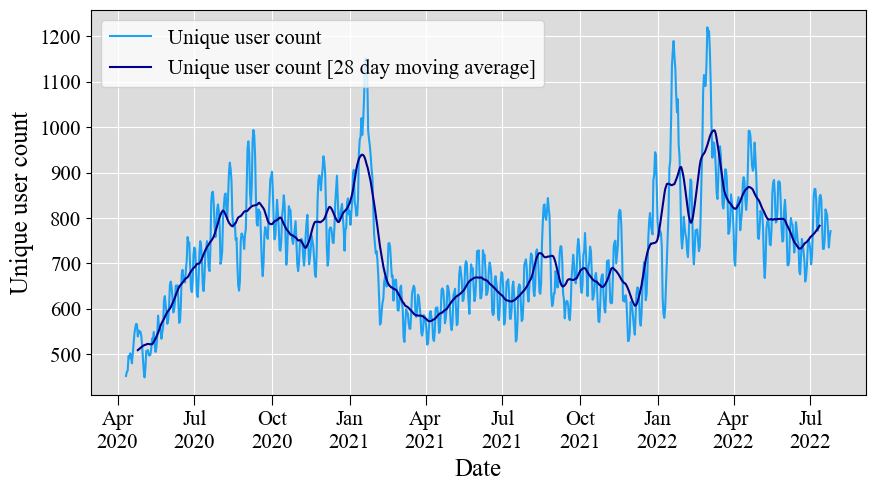

In [6]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.rcParams["font.family"] = "Times New Roman"
sns.lineplot(ax = ax, x='date', y='number_unique_users', data=df, color="#1DA1F2",label ='Unique user count')
sns.lineplot(ax = ax, x='date', y='number_unique_users_avg', data=df, color='darkblue', label ='Unique user count [28 day moving average]')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
plt.setp(ax.xaxis.get_majorticklabels(), size= 15)
plt.setp(ax.yaxis.get_majorticklabels(), size= 15)
ax.tick_params(axis = 'x', which = 'major', length = 7)
ax.tick_params(axis = 'x', which = 'minor', length = 20)
plt.xlabel('Date', size=18)
plt.ylabel('Unique user count', size=18)
ax.legend(prop={'size': 15})
ax.grid(True, color='white')
ax.set_facecolor('gainsboro')
plt.show()

Plot the temporal singal of 'average travel distance'

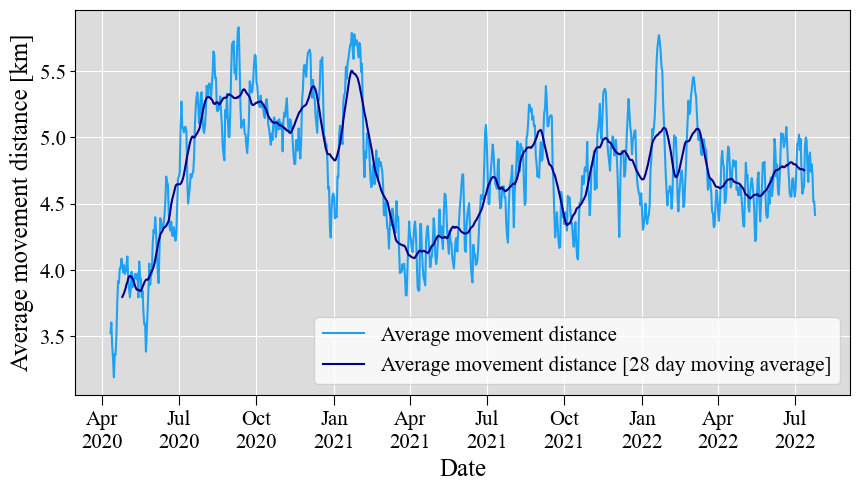

In [7]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.rcParams["font.family"] = "Times New Roman"
sns.lineplot(ax = ax, x='date',  y='jl_simple_means_over_user_means', data=df, color="#1DA1F2",label ='Average movement distance')
sns.lineplot(ax = ax, x='date', y='jl_simple_means_over_user_means_avg', data=df, color='darkblue', label ='Average movement distance [28 day moving average]')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
plt.setp(ax.xaxis.get_majorticklabels(), size= 15)
plt.setp(ax.yaxis.get_majorticklabels(), size= 15)
ax.tick_params(axis = 'x', which = 'major', length = 7)
ax.tick_params(axis = 'x', which = 'minor', length = 20)
plt.xlabel('Date', size=18)
plt.ylabel('Average movement distance [km]', size=18)
ax.legend(prop={'size': 15})
ax.grid(True, color='white')
ax.set_facecolor('gainsboro')
plt.show()

Plot the temporal singal of 'graph modularity' 

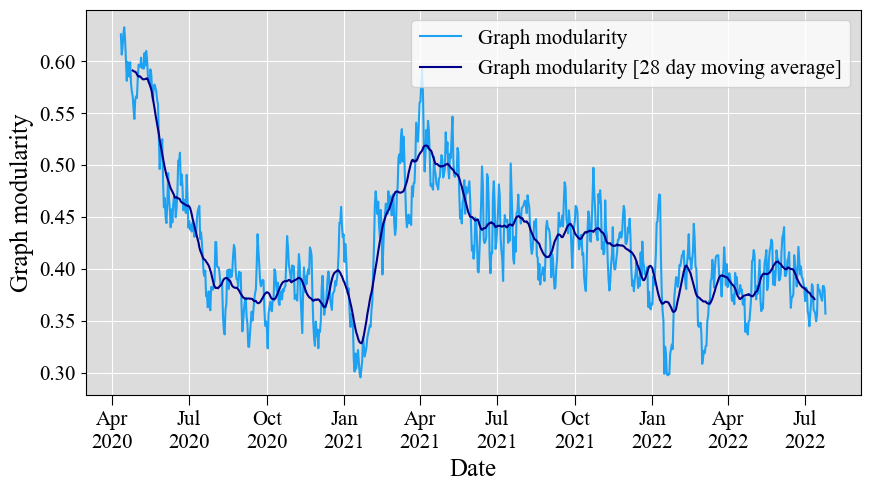

In [8]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.rcParams["font.family"] = "Times New Roman"
sns.lineplot(ax = ax, x='date',  y='graph_modularity', data=df, color="#1DA1F2",label ='Graph modularity')
sns.lineplot(ax = ax, x='date', y='graph_modularity_avg', data=df, color='darkblue', label ='Graph modularity [28 day moving average]')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
plt.setp(ax.xaxis.get_majorticklabels(), size= 15)
plt.setp(ax.yaxis.get_majorticklabels(), size= 15)
ax.tick_params(axis = 'x', which = 'major', length = 7)
ax.tick_params(axis = 'x', which = 'minor', length = 20)
plt.xlabel('Date', size=18)
plt.ylabel('Graph modularity', size=18)
ax.legend(prop={'size': 15})
ax.grid(True, color='white')
ax.set_facecolor('gainsboro')
plt.show()

Plot the temporal singal of 'radius of gyration' 

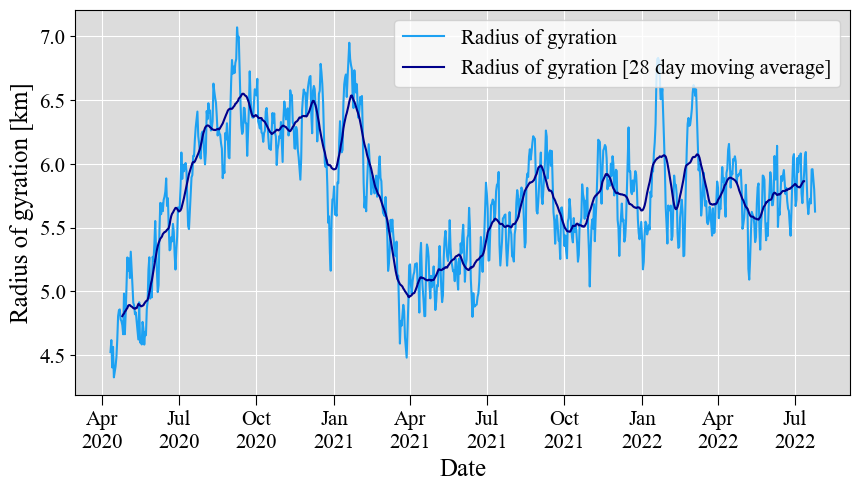

In [9]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.rcParams["font.family"] = "Times New Roman"
sns.lineplot(ax = ax, x='date',  y='mean_rog', data=df, color="#1DA1F2",label ='Radius of gyration')
sns.lineplot(ax = ax, x='date', y='mean_rog_avg', data=df, color='darkblue', label ='Radius of gyration [28 day moving average]')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
plt.setp(ax.xaxis.get_majorticklabels(), size= 15)
plt.setp(ax.yaxis.get_majorticklabels(), size= 15)
ax.tick_params(axis = 'x', which = 'major', length = 7)
ax.tick_params(axis = 'x', which = 'minor', length = 20)
plt.xlabel('Date', size=18)
plt.ylabel('Radius of gyration [km]', size=18)
ax.legend(prop={'size': 15})
ax.grid(True, color='white')
ax.set_facecolor('gainsboro')
plt.show()

Plot the temporal singal of '% activity in residential areas' 

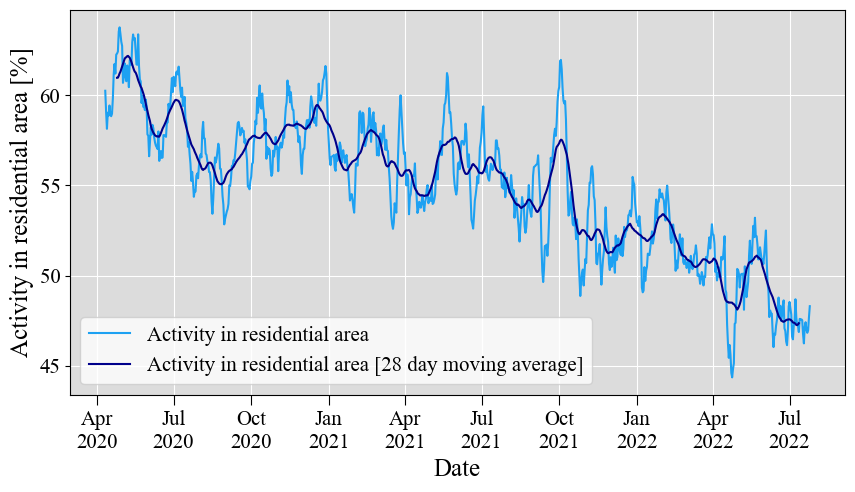

In [10]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.rcParams["font.family"] = "Times New Roman"
sns.lineplot(ax = ax, x='date',  y='rel_tweets_in_residential_areas', data=df, color="#1DA1F2",label ='Activity in residential area')
sns.lineplot(ax = ax, x='date', y='rel_tweets_in_residential_areas_avg', data=df, color='darkblue', label ='Activity in residential area [28 day moving average]')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
plt.setp(ax.xaxis.get_majorticklabels(), size= 15)
plt.setp(ax.yaxis.get_majorticklabels(), size= 15)
ax.tick_params(axis = 'x', which = 'major', length = 7)
ax.tick_params(axis = 'x', which = 'minor', length = 20)
plt.xlabel('Date', size=18)
plt.ylabel('Activity in residential area [%]', size=18)
ax.legend(prop={'size': 15})
ax.grid(True, color='white')
ax.set_facecolor('gainsboro')
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1)) 
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
plt.show()